In [1]:
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import sklearn
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

In [2]:
fname='./data.csv'
df=pd.read_csv(fname,encoding='utf-8')
df.head()


,Watershed area,Relative elevation difference,Average slope,NDVI,Clay content,Sand content,Silt content,Density of urban primary roads,Density of urban secondary roads,Density of urban tertiary roads,Density of urban quaternary roads,Highway density,Railway density,Fracture zone density,Average rainfall during the rainy season,Number of rainstorms,Number of heavy rainstorms,Number of heavy rains,exist
0,0.567935,277,27.903000,0.027054,8.000000,80.000000,12.000000,0,0.0,0.0,0.005915,0,0,0.012694,2.82563,0.004865,0.004865,0.004865,0
1,57.844101,3176,30.784300,0.370054,15.963000,55.500000,28.537001,0,0.0,0.0,0.000080,0,0,0.000054,2.95123,0.495488,0.495488,0.495488,1
2,0.801935,1306,34.122002,-0.035788,8.131340,79.666603,12.202100,0,0.0,0.0,0.006642,0,0,0.006128,3.21309,0.006869,0.006869,0.006869,0
3,98.233101,4197,33.801998,0.290875,16.052601,55.326302,28.621099,0,0.0,0.0,0.000058,0,0,0.000085,3.19034,2.000000,2.000000,2.000000,1
4,2.046280,1298,42.111301,-0.153919,8.000000,80.000000,12.000000,0,0.0,0.0,0.002916,0,0,0.034815,3.53715,0.017528,0.017528,0.017528,0


In [3]:
# Divide the positive and negative samples
print(df.exist.value_counts())
data_x = df.drop('exist',axis=1)
data_x.head()
label_y = df.exist

# Data imbalance requires sampling
smo = SMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(data_x, label_y)
print(Counter(y_smo))

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_smo, y_smo, random_state=0, train_size=0.7, test_size=0.3)

0    624
1    446
Name: exist, dtype: int64
Counter({0: 624, 1: 624})


In [4]:
#Train LSVM classifiers
linear_svm = svm.SVC(kernel='linear',probability=True)
linear_svm.fit(x_train, y_train.ravel())

#train rfbSVM classifiers
rbf_svm = svm.SVC(C=1,kernel='rbf',gamma=2,decision_function_shape='ovr') # ovr: one-to-many strategy
rbf_svm.fit(x_train, y_train.ravel()) 
# ravel function defaults to row order precedence in dimensionality reduction


SVC(C=1, gamma=2)

In [5]:
# Predictions on test sets
linear_svm_pred = linear_svm.predict(x_test)
rbf_svm_pred = rbf_svm.predict(x_test)

# Calculation accuracy
linear_svm_accuracy = accuracy_score(y_test, linear_svm_pred)
rbf_svm_accuracy = accuracy_score(y_test, rbf_svm_pred)

# Calculate AUC values
linear_svm_auc = roc_auc_score(y_test, linear_svm_pred)
rbf_svm_auc = roc_auc_score(y_test, rbf_svm_pred)

# Output accuracy and AUC values
print("Linear SVM Accuracy:", linear_svm_accuracy)
print("RBF SVM Accuracy:", rbf_svm_accuracy)
print("Linear SVM AUC:", linear_svm_auc)
print("RBF SVM AUC:", rbf_svm_auc)

Linear SVM Accuracy: 0.7173333333333334
RBF SVM Accuracy: 0.4693333333333333
Linear SVM AUC: 0.715609296482412
RBF SVM AUC: 0.5


Linear SVM Feature Importance Ranking:
Factor 9: Weight = 2.653650811760848
Factor 15: Weight = 0.9764470631997568
Factor 14: Weight = 0.9270428377967159
Factor 10: Weight = 0.7657667946298584
Factor 4: Weight = 0.6293760832052445
Factor 11: Weight = 0.5027747669920096
Factor 17: Weight = 0.3559107680616125
Factor 18: Weight = 0.3559107680616125
Factor 16: Weight = 0.3559107680616125
Factor 3: Weight = 0.1297817446523588
Factor 5: Weight = 0.07254138105646746
Factor 7: Weight = 0.04951392554097822
Factor 6: Weight = 0.02228449716925951
Factor 1: Weight = 0.014826901057112707
Factor 2: Weight = 0.0015602857747580856
Factor 12: Weight = 0.0
Factor 13: Weight = 0.0
Factor 8: Weight = 0.0


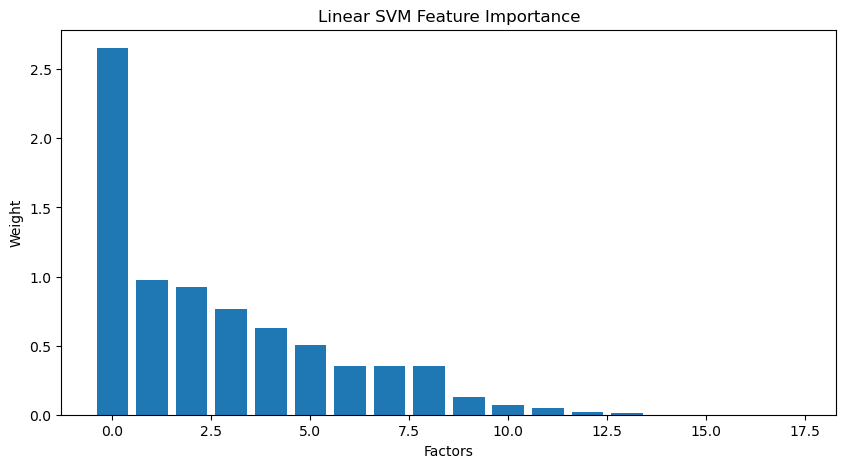

In [6]:
# Calculate factor importance rankings for linear SVMs
linear_svm_weights = linear_svm.coef_[0]
linear_svm_feature_importance = np.abs(linear_svm_weights)
linear_svm_sorted_indices = np.argsort(linear_svm_feature_importance)[::-1]
linear_svm_sorted_weights = linear_svm_feature_importance[linear_svm_sorted_indices]

# Importance ranking of output factors and weighting diagrams
print("Linear SVM Feature Importance Ranking:")
for i, index in enumerate(linear_svm_sorted_indices):
    print(f"Factor {index+1}: Weight = {linear_svm_sorted_weights[i]}")

plt.figure(figsize=(10, 5))
plt.bar(range(len(linear_svm_feature_importance)), linear_svm_sorted_weights)
plt.xlabel("Factors")
plt.ylabel("Weight")
plt.title("Linear SVM Feature Importance")
plt.show()